In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os.path import exists
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
articles = pd.read_csv("/content/drive/MyDrive/DIC/articles.csv")

In [ ]:
df = articles.copy().iloc[:1000]
df = pd.DataFrame(df,
     columns=articles.copy().columns)

In [ ]:
from locale import ABDAY_1
from re import A
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

kmeans_kwargs = {"init": "random","n_init": 20,"max_iter": 1000,"random_state": 1984}
maxvars=3
kmin=3
kmax=8
df1 = df.corr()['garment_group_name']
df1 = df1.sort_values(ascending=False).drop_duplicates()
cols = list(df1.index)[1:]
results_for_each_k=[]
vars_for_each_k={}

for k in range(kmin,kmax+1):
    
    selected_variables=[]

    while(len(selected_variables)<maxvars):
        results=[]
        for col in cols:
            scols=[]
            scols.extend(selected_variables)
            scols.append(col) 
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(df[scols])
            results.append(silhouette_score(df[scols], kmeans.predict(df[scols])))
        selected_var=cols[np.argmax(results)]
        selected_variables.append(selected_var)
        cols.remove(selected_var)
    results_for_each_k.append(max(results))
    vars_for_each_k[k]=selected_variables

selected_k=np.argmax(results_for_each_k)+kmin
selected_variables=vars_for_each_k[selected_k]
kmeans = KMeans(n_clusters=selected_k, **kmeans_kwargs)
kmeans.fit(df[selected_variables])
clusters=kmeans.predict(df[selected_variables])




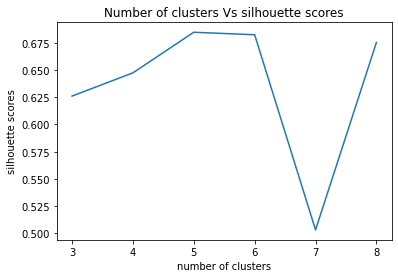

In [ ]:
%matplotlib inline

silhouette_scores = results_for_each_k
num_of_clusters = [3,4,5,6,7,8]
  
plt.plot(num_of_clusters, silhouette_scores)
plt.title('Number of clusters Vs silhouette scores')
plt.xlabel('number of clusters')
plt.ylabel('silhouette scores')
plt.show()


In [ ]:
for i in range(selected_k):
  res = np.where(clusters==i)
  min_value = (df.iloc[res]['perceived_colour_value_name'].min(),df.iloc[res]['perceived_colour_value_id'].min(),df.iloc[res]['colour_group_code'].min())
  max_value = (df.iloc[res]['perceived_colour_value_name'].max(),df.iloc[res]['perceived_colour_value_id'].max(),df.iloc[res]['colour_group_code'].max())
  print("Range of cluster " + str(i) + ":", min_value, "-", max_value)

Range of cluster 0: (-0.8832247504941123, -0.15516827208890302, 0.5068514757942602) - (-0.21411509102887574, 0.5194763891671971, 2.3795015747902704)
Range of cluster 1: (-0.8832247504941123, -0.15516827208890302, -1.0287216053824682) - (-0.21411509102887574, 0.5194763891671971, 0.057415452035217716)
Range of cluster 2: (0.4549945684363608, -1.5044575946011034, -0.8789095974627873) - (1.1241042279015974, -0.8298129333450032, 0.13232145599505812)
Range of cluster 3: (0.4549945684363608, -1.5044575946011034, 0.8064754916336218) - (1.1241042279015974, -0.8298129333450032, 2.3795015747902704)
Range of cluster 4: (1.7932138873668337, 1.1941210504232973, -1.0661746073623883) - (3.1314332062973067, 2.5434103729354973, 2.3795015747902704)


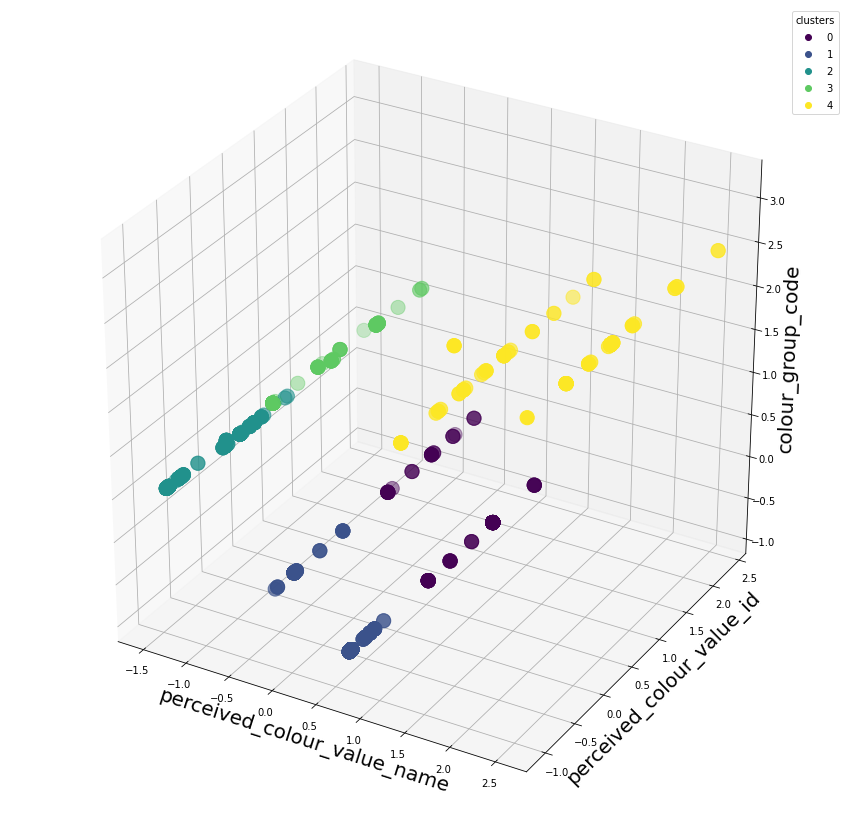

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection="3d")
z_points = df[selected_variables[0]]
x_points = df[selected_variables[1]]
y_points = df[selected_variables[2]]

f1=ax.scatter3D(x_points, y_points, z_points, c=clusters, s=200);

ax.set_xlabel(selected_variables[0],fontsize = 20)
ax.set_ylabel(selected_variables[1],fontsize = 20)
ax.set_zlabel(selected_variables[2],fontsize = 20)
ax.legend(*f1.legend_elements(), title='clusters')

plt.show()